In [2]:
from os import listdir
from os.path import isfile, join
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

txtpath = "scratch_cc"
onlyfiles = [f for f in listdir(txtpath) if isfile(join(txtpath, f))]
#allandsingbandfiles = [f for f in onlyfiles if "all_and_sing" in f]
#allbandfiles = [f for f in allandsingbandfiles if "all_band" in f]
#allc1files = [f for f in allbandfiles if "mu_obs_len" in f]
#print(allbandfiles)

In [3]:
#data = pd.DataFrame()
pd.set_option('display.max_rows', None)
#col_allband = ["band", "fits", "object", "Tau", "V", "Num_Obs", "Mu_Bright"] #maybe add coordinates from fits.

#for f in onlyfiles:
#    tmp = pd.read_csv(txtpath+'/'+f, names=col_allband, skiprows=1, delimiter="\t")
    #print(tmp)

#    data = pd.concat([data,tmp],axis=0)
#data = data.sort_values(by=['fits', 'object'])

#print(data.shape)
#print(data)
#data.to_csv("all_and_sing_df_all.csv")

In [128]:
#data_new = pd.DataFrame()
#pd.set_option('display.max_rows', None)
#col_allband = ["band", "fits", "object", "Tau", "V", "Num_Obs", "Mu_Bright"] #maybe add coordinates from fits.

#for f in onlyfiles:
#    if "optimal" in f:
#        continue
#    tmp = pd.read_csv(txtpath+'/'+f, names=col_allband, skiprows=1, delimiter="\t")
#    #print(tmp)

#    data_new = pd.concat([data,tmp],axis=0)
#data_new = data_new.sort_values(by=['fits', 'object'])

#print(data_new.shape)
#print(data)
#data_new.to_csv("all_and_sing_df_all_no_optimal_new.csv")

data_new = pd.read_csv("all_and_sing_df_all_RA_DEC_ID_no_optimal_new_mod.csv")

for column in ["object", 'Num_Obs', "COADD_OBJECT_ID"]:
    data_new[column] = data_new[column].map(lambda x: int(x))
    
for column in ["RA", "Dec", "Tau", "V", "Mu_Bright"]:
    data_new[column] = data_new[column].map(lambda x: 0 if x== "infnf" else x)
    data_new[column] = data_new[column].map(lambda x: np.float(x))
    
data_new["band"] = data_new["band"].str.strip()
data_new['band'] = data_new['band'].str.replace('\d+', '')
data_new["band"] = data_new["band"].str.strip(".")
data_new = data_new.drop(columns=['Unnamed: 0'])

print(data_new.columns)

Index(['band', 'fits', 'object', 'COADD_OBJECT_ID', 'RA', 'Dec', 'Tau', 'V',
       'Num_Obs', 'Mu_Bright'],
      dtype='object')


In [181]:
data_new.head(10)

band fits  object  COADD_OBJECT_ID         RA        Dec       Tau  \
0  All   C1      23       1398942991  53.816479 -28.087091  1.344104   
1    z   C1      23       1398942991  53.816479 -28.087091  0.897972   
2  All   C1      92       1398942810  53.945625 -28.083435  1.398423   
3    i   C1      92       1398942810  53.945625 -28.083435  1.148313   
4  All   C1     112       1398942896  54.011875 -28.082512  3.408844   
5    g   C1     112       1398942896  54.011875 -28.082512  3.999284   
6  All   C1     138       1398942609  53.882717 -28.081196  3.983408   
7    z   C1     138       1398942609  53.882717 -28.081196  0.000031   
8  All   C1     144       1404633536  54.570648 -28.080921  1.637854   
9    z   C1     144       1404633536  54.570648 -28.080921  0.000028   

          V  Num_Obs  Mu_Bright  
0 -2.080653      390  18.742426  
1 -2.319796      178  17.269523  
2 -1.911252      227  20.106253  
3 -1.241843       11  19.291334  
4 -0.760919      112  23.908417  
5 -2.613931       10  24.475279  
6 -2.997880      699  19.835594  
7 -2.148228      290  18.826763  
8 -2.845116      697  17.835774  
9 -1.638124      282  17.173931

In [257]:
data_new.to_csv("DESVAR.csv")

In [315]:
import math
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

print(data_new.shape)
print(len(pd.unique(data_new['COADD_OBJECT_ID'])))

data_match = pd.read_csv("DESVAR_DR2_match.csv")
print(data_match.shape)
print(data_match.columns)
print(len(pd.unique(data_match['COADD_OBJECT_ID_2'])))


data_match = data_match.drop(columns=['fit_obj', "GroupSize", "GroupID", "col1"])
data_match["COADD_OBJECT_ID_2"] = data_match["COADD_OBJECT_ID_2"].fillna(0).astype(int)
data_match = data_match.rename(columns={"COADD_OBJECT_ID_1": "COADD_OBJECT_ID_Y6A1", 
                           "COADD_OBJECT_ID_2": "COADD_OBJECT_ID_DR2", 
                           "RA_1":"RA_Y6A1", 
                           "Dec_1": "DEC_Y6A1", 
                           "RA_2": "RA_DR2", 
                           "DEC_2": "DEC_DR2"})
#data_match["COADD_OBJECT_ID_2"] = data_match["COADD_OBJECT_ID_2"].replace({0:np.nan})
data_match.head(10)
#data_match.head(15).to_csv("DESVAR_sample.csv")

#data_match.to_csv("DESVAR_DR2.csv")

(223429, 11)
93641
(223429, 18)
Index(['col1', 'band', 'fits', 'object', 'COADD_OBJECT_ID_1', 'RA_1', 'Dec_1',
       'Tau', 'V', 'Num_Obs', 'Mu_Bright', 'fit_obj', 'COADD_OBJECT_ID_2',
       'RA_2', 'DEC_2', 'GroupID', 'GroupSize', 'Separation'],
      dtype='object')
93605


band fits  object  COADD_OBJECT_ID_Y6A1    RA_Y6A1   DEC_Y6A1       Tau  \
0  All   C1      23            1398942991  53.816479 -28.087091  1.344104   
1    z   C1      23            1398942991  53.816479 -28.087091  0.897972   
2  All   C1      92            1398942810  53.945625 -28.083435  1.398423   
3    i   C1      92            1398942810  53.945625 -28.083435  1.148313   
4  All   C1     112            1398942896  54.011875 -28.082512  3.408844   
5    g   C1     112            1398942896  54.011875 -28.082512  3.999284   
6  All   C1     138            1398942609  53.882717 -28.081196  3.983408   
7    z   C1     138            1398942609  53.882717 -28.081196  0.000031   
8  All   C1     144            1404633536  54.570648 -28.080921  1.637854   
9    z   C1     144            1404633536  54.570648 -28.080921  0.000028   

          V  Num_Obs           Mu_Bright  COADD_OBJECT_ID_DR2     RA_DR2  \
0 -2.080653      390  18.742425963282585           1398942991  53.816477   
1 -2.319796      178  17.269522547721866           1398942991  53.816477   
2 -1.911252      227   20.10625308379531           1398942810  53.945625   
3 -1.241843       11  19.291334450244907           1398942810  53.945625   
4 -0.760919      112  23.908416964113712           1398942896  54.011875   
5 -2.613931       10  24.475279301404953           1398942896  54.011875   
6 -2.997880      699  19.835594445466995           1398942609  53.882717   
7 -2.148228      290   18.82676303386688           1398942609  53.882717   
8 -2.845116      697  17.835774347186092           1404633536  54.570650   
9 -1.638124      282  17.173931002616882           1404633536  54.570650   

     DEC_DR2  Separation  
0 -28.087091    0.005722  
1 -28.087091    0.005722  
2 -28.083435    0.000992  
3 -28.083435    0.000992  
4 -28.082511    0.003283  
5 -28.082511    0.003283  
6 -28.081195    0.003022  
7 -28.081195    0.003022  
8 -28.080921    0.005772  
9 -28.080921    0.005772

In [300]:
data_clean = data_new.loc[(data_new["Tau"]>=0.05)]
data_clean = data_clean.loc[(data_clean["Tau"]<=3.95)]
data_clean = data_clean.loc[(data_clean["V"]>=-2)]
data_clean = data_clean.loc[((data_clean["V"]+4)/(data_clean["Tau"]+1) >= 1/2)]
data_clean_new = data_clean.loc[(data_clean["Mu_Bright"]<22)]

print(len(data_clean_new["COADD_OBJECT_ID"].unique()))

print(data_clean_new.shape)

14889
(32163, 11)


In [365]:
print(data_clean.shape)
print(data_clean.head(10))
print(data_clean["Tau"].mean())
print(data_clean["Tau"].std())
print(data_clean["Num_Obs"].mean())

(123286, 11)
   band fits  object  COADD_OBJECT_ID         RA        Dec       Tau  \
2   All   C1      92       1398942810  53.945625 -28.083435  1.398423   
3     i   C1      92       1398942810  53.945625 -28.083435  1.148313   
4   All   C1     112       1398942896  54.011875 -28.082512  3.408844   
12  All   C1     177       1404633709  54.740044 -28.079266  1.800426   
28    r   C1     332       1398942005  53.829651 -28.072844  1.492186   
32    r   C1     397       1398941810  53.820820 -28.070679  2.119123   
35  All   C1     455       1404632652  54.567619 -28.068153  1.420986   
38    g   C1     490       1398941477  54.027882 -28.067068  2.352725   
39  All   C1     495       1398941451  53.930775 -28.066870  0.321675   
42    g   C1     543       1398940641  54.065331 -28.064451  0.534465   

           V  Num_Obs  Mu_Bright fit_obj  
2  -1.911252      227  20.106253    C192  
3  -1.241843       11  19.291334    C192  
4  -0.760919      112  23.908417   C1112  
12 -1.08934

In [188]:
data_clean_nl = data_clean
for column in ["Tau", "V", ]:
    data_clean_nl[column] = data_clean[column].map(lambda x: 10**x)
print(data_clean_nl["Tau"].mean())
print(data_clean_nl["Tau"].std())
print(data_clean_nl["V"].mean())
print(data_clean_nl["V"].std())

264.41090539469656
786.9295169253743
0.39104460041313766
2.5301550273422673


In [116]:
print(data_clean["V"].mean())
print(data_clean["V"].std())

-0.7892218707710197
0.4762868499379351


In [193]:
print(data_clean["band"].value_counts())


All    47014
g      34202
r      21413
i      12810
z       7847
Name: band, dtype: int64


In [194]:
d_all = data_clean.loc[(data_clean["band"])=="All"]
d_all["fits"].value_counts()#[2:].sum()

C3    20053
X3    13738
C2     3206
S2     2015
E1     1695
C1     1480
E2     1283
X2     1254
S1     1250
X1     1040
Name: fits, dtype: int64

In [218]:
data_clean_rep = data_clean
data_clean_rep["fit_obj"] = data_clean_rep["fits"]+data_clean_rep["object"].astype(str)
data_clean_rep["fit_obj"].value_counts().value_counts()
#print(a.type())
#for ID, num in a.items():
#    if num ==10:
#        print(data_clean.loc[(data_clean["COADD_OBJECT_ID"])== ID])

2    32665
1    29545
3     3683
4     2048
5     1834
Name: fit_obj, dtype: int64

In [164]:
#full_data = pd.read_csv("X3_C3_debug_full.csv") #all_and_sing_df_all_RA_DEC_ID.csv")
#full_data.head(10)
#full_data.shape
non_var_df = pd.read_csv("../../all_non_var_df.csv")
non_var_df['fits'].value_counts()

C3    968004
X3    914545
E2    594522
C1    580380
C2    579451
E1    543061
S2    508376
X1    507119
X2    497318
S1    491121
Name: fits, dtype: int64

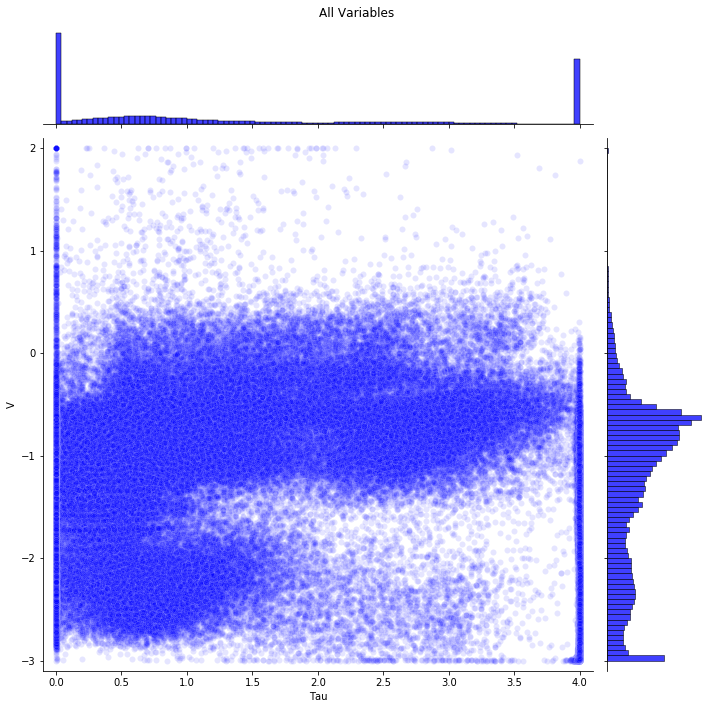

In [9]:

p = sn.jointplot(x="Tau", y="V", data=data_new #[data_new["Mu_Bright"]<=22.5]
                 , edgecolor="white", marginal_kws=dict(bins=100), height=10, color='blue', alpha=0.1)
p.ax_marg_x.set_xlim(-0.1, 4.1)
p.ax_marg_y.set_ylim(-3.1, 2.1)
p.fig.suptitle("All Variables")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

In [357]:
def multivariateGrid(col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=.5, title_label = "Variables", 
                     filepath = "var_distplot.png"):
    def colored_scatter(x, y, c=None):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['c'] = c
            kwargs['alpha'] = scatter_alpha
            plt.scatter(*args, **kwargs)

        return scatter
    sn.set(rc = {'figure.figsize':(15,8)})
    g = sn.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    color = None
    legends=[]
    
    for name, df_group in df.groupby(col_k):
        legends.append(name)
        if k_is_color:
            color=name
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color),
        )
        sn.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color
        )
        sn.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color,            
            vertical=True
        )
    # Do also global Hist:
    sn.distplot(
        df[col_x].values,
        ax=g.ax_marg_x,
        color='grey'
    )
    sn.distplot(
        df[col_y].values.ravel(),
        ax=g.ax_marg_y,
        color='grey',
        vertical=True
    )
    #plt.legend(["g", "r", "i", "z"], fontsize=14, loc="upper right")
    plt.legend(legends, bbox_to_anchor=(1.2, 1.0), loc='upper left', fontsize=14) #fontsize=14, loc="upper right")
    
    
    plt.xlim(-0.1, 4.1)
    plt.ylim(-3.1, 2.1)
    #plt.title(title_label)#, fs= 14)
    #plt.tight_layout()
    #plt.subplots_adjust(top=0.95)
    plt.xlabel(r"$log(\tau)$", fontsize=16)
    plt.ylabel(r"$log(V)$", fontsize=16)
    figure = plt.gcf()

    figure.set_size_inches(8, 6)
    plt.savefig(filepath, dpi=200, bbox_inches='tight')

    


/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/p

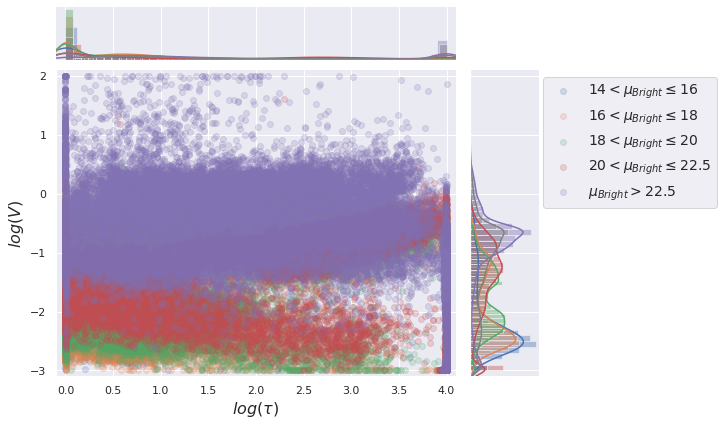

In [358]:
df1 = data_new.loc[(data_new["Mu_Bright"]<=22.5) & (data_new["Mu_Bright"]>20.0)]
df2 = data_new.loc[(data_new["Mu_Bright"]<=20.0) & (data_new["Mu_Bright"]>18.0)]
df3 = data_new.loc[(data_new["Mu_Bright"]<=18.0) & (data_new["Mu_Bright"]>16.0)]
df4 = data_new.loc[(data_new["Mu_Bright"]<=16.0) & (data_new["Mu_Bright"]>14.0)]
df5 = data_new.loc[(data_new["Mu_Bright"]>22.5)]

df1['m_crit']= r'$20<\mu_{Bright} \leq 22.5$'
df2['m_crit']= r'$18<\mu_{Bright} \leq 20$'
df3['m_crit']= r'$16<\mu_{Bright} \leq 18$'
df4['m_crit']= r'$14<\mu_{Bright} \leq 16$'
df5['m_crit']= r'$\mu_{Bright}>22.5$'

df_crit = pd.concat([df1, df2, df3, df4, df5])
multivariateGrid('Tau', 'V', 'm_crit', df=df_crit, scatter_alpha = 0.2, title_label="Variables Magnitude Clustering",
                 filepath = "mag_cuts_vars_distplot.png")



/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/p

/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


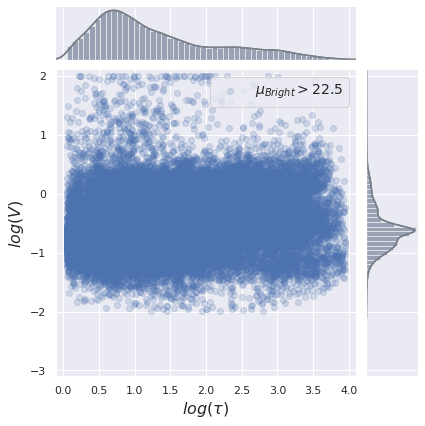

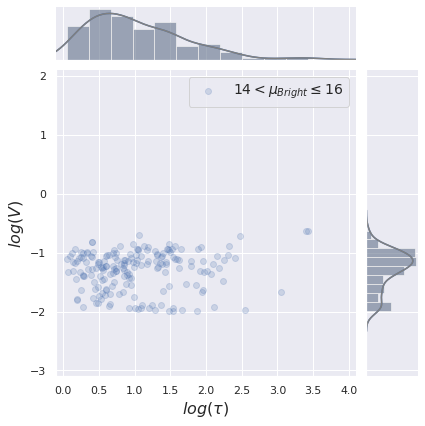

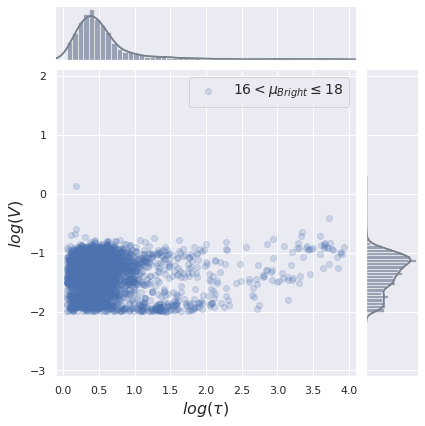

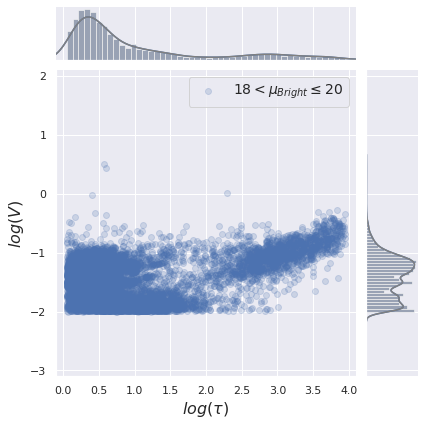

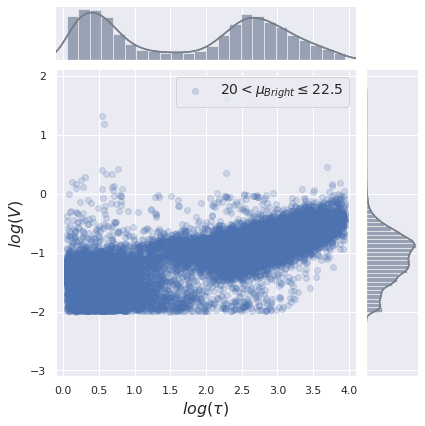

In [352]:
data_clean = data_new.loc[(data_new["Tau"]>=0.05)]
data_clean = data_clean.loc[(data_clean["Tau"]<=3.95)]
data_clean = data_clean.loc[(data_clean["V"]>=-2)]
data_clean = data_clean.loc[((data_clean["V"]+4)/(data_clean["Tau"]+1) >= 1/2)]


df1 = data_clean.loc[(data_clean["Mu_Bright"]<=22.5) & (data_clean["Mu_Bright"]>20)]
df2 = data_clean.loc[(data_clean["Mu_Bright"]<=20) & (data_clean["Mu_Bright"]>18)]
df3 = data_clean.loc[(data_clean["Mu_Bright"]<=18) & (data_clean["Mu_Bright"]>16)]
df4 = data_clean.loc[(data_clean["Mu_Bright"]<=16) & (data_clean["Mu_Bright"]>14)]
df5 = data_clean.loc[(data_clean["Mu_Bright"]>22.5)]

df1['m_crit']= r'$20<\mu_{Bright} \leq 22.5$'
df2['m_crit']= r'$18<\mu_{Bright} \leq 20$'
df3['m_crit']= r'$16<\mu_{Bright} \leq 18$'
df4['m_crit']= r'$14<\mu_{Bright} \leq 16$'
df5['m_crit']= r'$\mu_{Bright}>22.5$'

df_crit = pd.concat([df1, df2, df3, df4, df5])
multivariateGrid('Tau', 'V', 'm_crit', df=df5, scatter_alpha = 0.2, title_label="Variables Magnitude Clustering",
                 filepath = "mag_cuts_vars_distplot_rigorous_22_5mag.png")
multivariateGrid('Tau', 'V', 'm_crit', df=df4, scatter_alpha = 0.2, title_label="Variables Magnitude Clustering",
                 filepath = "mag_cuts_vars_distplot_rigorous_14mag.png")
multivariateGrid('Tau', 'V', 'm_crit', df=df3, scatter_alpha = 0.2, title_label="Variables Magnitude Clustering",
                 filepath = "mag_cuts_vars_distplot_rigorous_16mag.png")
multivariateGrid('Tau', 'V', 'm_crit', df=df2, scatter_alpha = 0.2, title_label="Variables Magnitude Clustering",
                 filepath = "mag_cuts_vars_distplot_rigorous_18mag.png")
multivariateGrid('Tau', 'V', 'm_crit', df=df1, scatter_alpha = 0.2, title_label="Variables Magnitude Clustering",
                 filepath = "mag_cuts_vars_distplot_rigorous_20mag.png")



In [242]:
df1 = data_clean.loc[(data_clean["Mu_Bright"]<=22.5) & (data_clean["Mu_Bright"]>20)]
print(df1)

       band fits  object  COADD_OBJECT_ID         RA        Dec       Tau  \
2       All   C1      92       1398942810  53.945625 -28.083435  1.398423   
55      All   C1     692       1398940597  54.076103 -28.059175  1.218325   
78      All   C1     975       1398939674  53.973969 -28.048086  3.269751   
79        g   C1     975       1398939674  53.973969 -28.048086  3.354160   
80        r   C1     975       1398939674  53.973969 -28.048086  3.203209   
136     All   C1    1737       1404628467  54.578873 -28.018715  2.709010   
137       g   C1    1737       1404628467  54.578873 -28.018715  2.518353   
138       r   C1    1737       1404628467  54.578873 -28.018715  2.866290   
139       i   C1    1737       1404628467  54.578873 -28.018715  2.820078   
155       g   C1    1806       1398936221  53.912586 -28.015539  0.802395   
158     All   C1    1947       1404627711  54.790382 -28.010019  0.953123   
198     All   C1    2306       1404626370  54.566681 -27.994967  3.295833   

/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/p

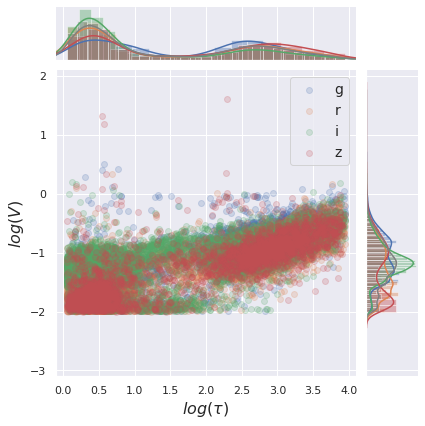

In [355]:
df1 = data_clean.loc[(data_clean["Mu_Bright"]<=22.5) & (data_clean["band"].isin(['g']))]
df2 = data_clean.loc[(data_clean["Mu_Bright"]<=22.5) & (data_clean["band"].isin(['r']))]
df3 = data_clean.loc[(data_clean["Mu_Bright"]<=22.5) & (data_clean["band"].isin(['i']))]
df4 = data_clean.loc[(data_clean["Mu_Bright"]<=22.5) & (data_clean["band"].isin(['z']))]
df5 = data_clean.loc[(data_clean["Mu_Bright"]<=22.5) & (data_clean["band"].isin(['All']))]

df1['m_crit']= 'g'
df2['m_crit']= 'r'
df3['m_crit']= 'i'
df4['m_crit']= 'z'
df5['m_crit']= 'All'

df_crit = pd.concat([df1, df2, df3, df4])#, df5])
#multivariateGrid('Tau', 'V', 'm_crit', df=df_crit, )
multivariateGrid('Tau', 'V', 'm_crit', df=df_crit, scatter_alpha = 0.2, title_label="Observation Band Clustering",
                 filepath = "band_cuts_vars_distplot_griz_rigorous.png")
#multivariateGrid('Tau', 'V', 'm_crit', df=df5, scatter_alpha = 0.2, title_label="Observation Band Clustering",
#                 filepath = "band_cuts_vars_distplot_all_rigorous.png")
#data_new_clean = data_new.loc[(data_new["band"].isin(['g']))] #, 'r', 'i', 'z']))]
#multivariateGrid('Tau', 'V', 'band', df=data_new_clean)

   Unnamed: 0 band fits  object  COADD_OBJECT_ID         RA        Dec  \
0           0  All   C1      23       1398942991  53.816479 -28.087091   
1           0    z   C1      23       1398942991  53.816479 -28.087091   
2           0  All   C1      92       1398942810  53.945625 -28.083435   
3           0    i   C1      92       1398942810  53.945625 -28.083435   
4           0  All   C1     112       1398942896  54.011875 -28.082512   
5           0    g   C1     112       1398942896  54.011875 -28.082512   
6           0  All   C1     138       1398942609  53.882717 -28.081196   
7           0    z   C1     138       1398942609  53.882717 -28.081196   
8           0  All   C1     144       1404633536  54.570648 -28.080921   
9           0    z   C1     144       1404633536  54.570648 -28.080921   

        Tau         V  Num_Obs  Mu_Bright  
0  1.344104 -2.080653      390  18.742426  
1  0.897972 -2.319796      178  17.269523  
2  1.398423 -1.911252      227  20.106253  
3  1.1483

/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/p

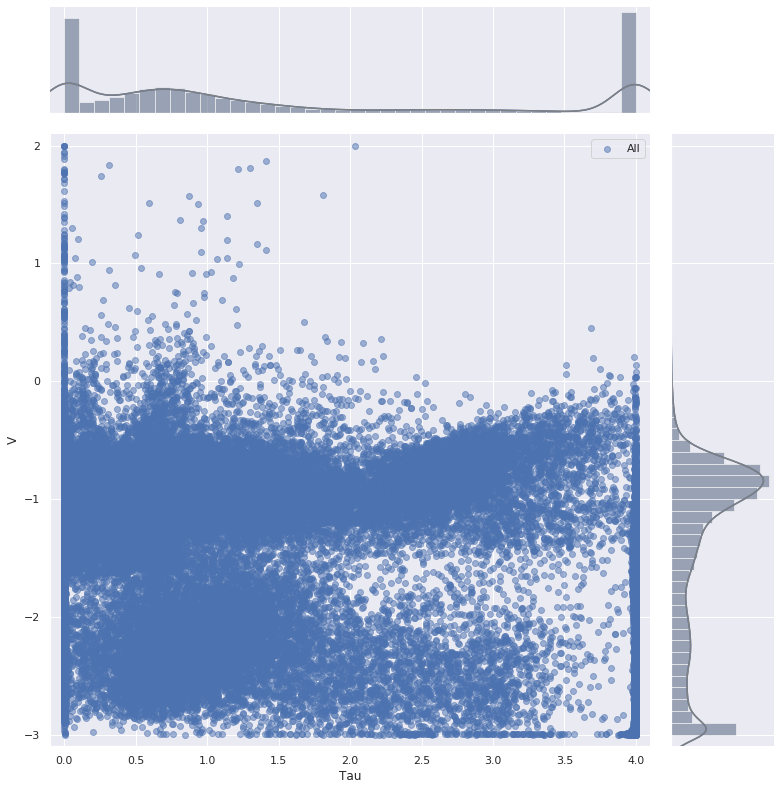

In [21]:
print(data_new[:10])
data_new_clean = data_new.loc[(data_new["band"].isin(["All"]))]
multivariateGrid('Tau', 'V', 'band', df=data_new_clean)

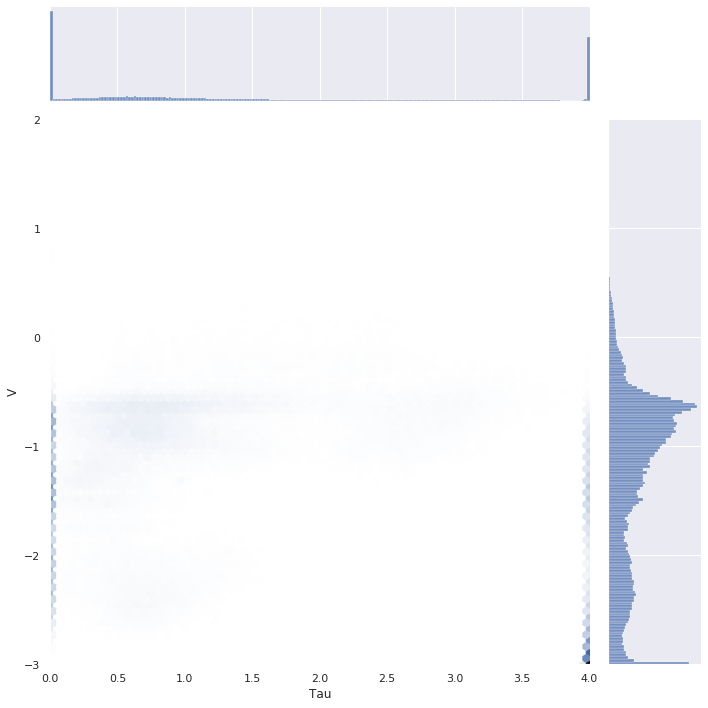

In [22]:
g = sn.jointplot(x="Tau", y="V", data=data_new, kind="hex",
                 xlim=(0,4), ylim=(-3,2), marginal_kws=dict(bins=200),
                 height=10, joint_kws=dict(gridsize=80))
#g.ax_marg_x.set_xlim(0, 4)
#g.ax_marg_y.set_ylim(-3, 2)

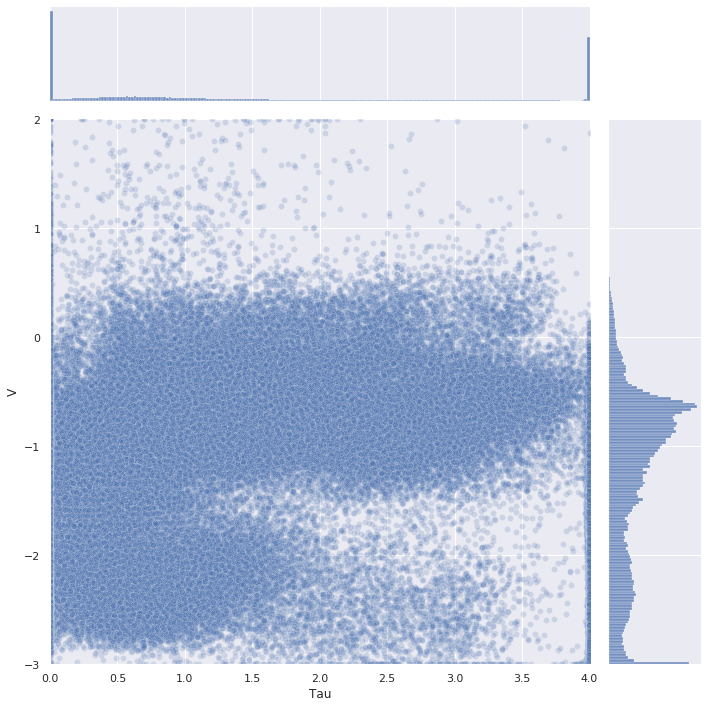

In [23]:
g = sn.jointplot(x="Tau", y="V", data=data_new,
                 xlim=(0,4), ylim=(-3,2), marginal_kws=dict(bins=200),
                 height=10, alpha=0.2)

In [359]:
col = sn.color_palette()

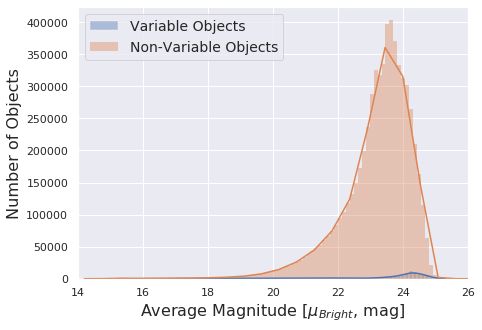

In [363]:
#print(sn.__version__)
plt.figure(figsize=(7,5))
sn.histplot(data_clean["Mu_Bright"].replace(np.inf, np.nan).dropna(), 
            label="Variable Objects", 
            bins=np.linspace(14, 26, 100),
            color = col[0], 
            alpha = 0.4, 
            kde = True)

sn.histplot(non_var_df["Mu_Bright"].replace(np.inf, np.nan).dropna(), 
            label="Non-Variable Objects", 
            bins=np.linspace(14, 26, 100),
            color = col[1], 
            alpha = 0.4,
            kde = True)

plt.legend(fontsize=14)
plt.xlabel(r"Average Magnitude [$\mu_{Bright}$, mag]", fontsize=16)
plt.ylabel(r"Number of Objects", fontsize=16)
#plt.yscale("log")
plt.xlim(14,26)
 
plt.savefig("var_nonvar_hist_rigor_non_norm.png")

/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


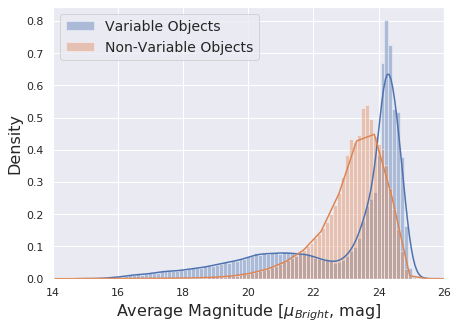

In [361]:
#print(sn.__version__)
plt.figure(figsize=(7,5))
sn.distplot(data_clean["Mu_Bright"].replace(np.inf, np.nan).dropna(), 
            label="Variable Objects", 
            bins=np.linspace(14, 26, 100),
            color = col[0])

sn.distplot(non_var_df["Mu_Bright"].replace(np.inf, np.nan).dropna(), 
            label="Non-Variable Objects", 
            bins=np.linspace(14, 26, 100),
            color = col[1])

plt.legend(fontsize=14)
plt.xlabel(r"Average Magnitude [$\mu_{Bright}$, mag]", fontsize=16)
plt.ylabel(r"Density", fontsize=16)
#plt.yscale("log")
plt.xlim(14,26)
 
plt.savefig("var_nonvar_hist_rigorous.png")

In [238]:
df = data_clean
df = df["Mu_Bright"].replace(np.inf, np.nan).dropna()
print(df)
#df = df.loc[(df["Mu_Bright"]<=22.5)]# & (df["Mu_Bright"]>20)]

2         20.106253
3         19.291334
4         23.908417
12        23.848296
28        24.071421
32        23.950021
38        24.438986
39        23.205473
42        17.336803
51        23.884275
55        20.150809
60        24.040632
61        23.903356
62        24.443892
63        23.749168
66        19.687935
68        18.994441
78        22.219433
79        22.278774
80        22.417499
85        23.001414
86        23.191664
87        23.807859
88        23.897281
90        24.334515
96        19.430034
97        19.820939
101       19.744076
105       19.041511
109       23.992337
128       23.919421
129       24.270947
131       24.251868
132       23.754873
133       24.182745
136       21.777226
137       21.989071
138       21.878527
139       21.619323
140       22.983670
141       23.382405
142       23.010117
143       23.751522
144       24.572514
150       19.971118
154       18.564236
155       20.383217
156       19.315977
158       21.992033
161       23.781053


/home/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  # This is added back by InteractiveShellApp.init_path()
/home/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  if sys.path[0] == '':
/home/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


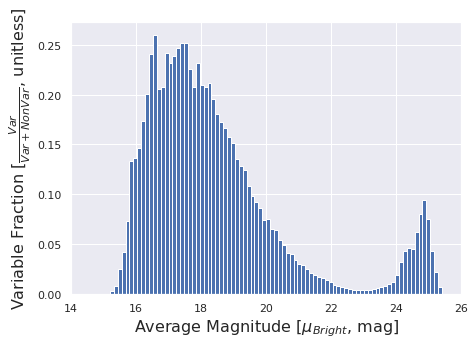

In [362]:
plt.figure(figsize=(7,5))
#sn.distplot(data_new["Mu_Bright"].replace(np.inf, np.nan).dropna(), 
#            label="Variable Objects", 
#            bins=np.linspace(14, 26, 70), 
#            norm_hist = False)

#sn.distplot(non_var_df["Mu_Bright"].replace(np.inf, np.nan).dropna(), 
#            label="Non-Variable Objects", 
#            bins=np.linspace(14, 26, 70), 
#            norm_hist = False)
var_hist, var_binedge = np.histogram(data_clean["Mu_Bright"].replace(np.inf, np.nan).dropna(), bins=100, range=(14,26), normed=False)
nonvar_hist, nonvar_binedge = np.histogram(non_var_df["Mu_Bright"].replace(np.inf, np.nan).dropna(), bins=100, range=(14,26), normed = False)
#print(var_hist)
#print(nonvar_hist)
width = (var_binedge[1] - var_binedge[0])
center = (var_binedge[:-1] + var_binedge[1:]) / 2
plt.bar(center, var_hist/(var_hist+nonvar_hist), align='center', width=width)
plt.xlim([14,26])
plt.xlabel(r"Average Magnitude [$\mu_{Bright}$, mag]", fontsize=16)
plt.ylabel(r"Variable Fraction [$\frac{Var}{Var+NonVar}$, unitless]", fontsize=16)
plt.savefig("var_frac_hist_rigorous.png")
plt.show()
#plt.legend()
#plt.xlim(13,26)

In [39]:
full_data[full_data.Tau>4]

Unnamed: 0  band fits  object  COADD_OBJECT_ID         RA        Dec  \
59238            0  All    C3   95002       1395310561  53.238377 -28.214842   
59305            0  All    C3   95066       1386556180  51.831154 -28.214451   
59316            0  All    C3   95075       1395310526  53.259319 -28.214380   
59320            0  All    C3   95079       1390171104  52.583275 -28.214354   
59382            0  All    C3   95200       1399576377  53.859776 -28.213623   
69415            0  All    C3  124029       1389081279  52.036678 -28.023476   
69419            0  All    C3  124054       1389081264  52.409351 -28.023251   
69477            0  All    C3  124172       1394590131  52.860916 -28.022484   
69487            0  All    C3  124184       1394590152  52.730972 -28.022413   
71621            0  All    C3  130510       1389077699  52.019196 -27.986795   
71635            0  All    C3  130531       1389077739  52.612633 -27.986712   
71685            0  All    C3  130616       1450756256  51.739983 -27.986158   
71691            0  All    C3  130621       1389077620  52.324261 -27.986135   
71715            0  All    C3  130654       1389077603  52.328041 -27.985949   
71735            0  All    C3  130686       1389077632  52.608574 -27.985781   
71763            0  All    C3  130713       1389077570  52.144081 -27.985605   
80221            0  All    C3  155679       1450740064  51.700851 -27.814377   
80261            0  All    C3  155762       1394570375  53.247021 -27.813875   
80351            0  All    C3  155855       1389061595  52.416592 -27.813234   
80357            0  All    C3  155863       1450739948  51.694702 -27.813198   
80365            0  All    C3  155878       1389061578  52.054974 -27.813063   
170490           0  All    X3   13040       1275332073  36.222034  -5.344294   
170518           0  All    X3   13076       1275332000  36.201221  -5.343891   
170584           0  All    X3   13205       1269831230  35.850025  -5.342470   
170622           0  All    X3   13242       1280733437  36.939198  -5.342045   
170630           0  All    X3   13266       1280732596  36.769371  -5.341784   
173752           0  All    X3   25018       1279155026  37.029202  -5.206002   
173760           0  All    X3   25029       1279155006  36.724144  -5.205864   
173768           0  All    X3   25039       1279155004  36.580177  -5.205802   
173836           0  All    X3   25156       1274308420  36.111069  -5.204769   
173856           0  All    X3   25181       1279154874  36.965679  -5.204472   
173872           0  All    X3   25193       1274308385  36.051399  -5.204379   
173904           0  All    X3   25217       1279154843  36.970276  -5.204140   
173970           0  All    X3   25311       1274308297  36.114006  -5.203354   
173994           0  All    X3   25332       1274308289  36.400723  -5.203183   
174223           0  All    X3   26047       1279154174  36.541698  -5.197262   
174239           0  All    X3   26072       1279154158  36.988255  -5.197098   
175342           0  All    X3   30003       1279151148  36.897968  -5.165034   
175352           0  All    X3   30012       1274304676  36.233097  -5.164977   
175410           0  All    X3   30125       1274304591  36.222015  -5.164124   
177495           0  All    X3   37698       1285415573  37.198162  -5.084364   
177541           0  All    X3   37791       1279143451  36.804634  -5.083567   
177551           0  All    X3   37798       1279143442  37.138222  -5.083444   
177561           0  All    X3   37817       1279143427  36.467442  -5.083290   
184132           0  All    X3   62039       1279126109  36.946640  -4.893677   
184234           0  All    X3   62228       1284877261  37.355755  -4.892449   
184292           0  All    X3   62381       1274279773  35.847221  -4.891426   
186503           0  All    X3   70550       1284871459  37.374767  -4.834194   
186507           0  All    X3   70557       1274274519  36.167545  -4.834162   
208113  

In [42]:
full_data[full_data.Tau<0]

Unnamed: 0  band fits  object  COADD_OBJECT_ID         RA        Dec  \
59239            0     g   C3   95002       1395310561  53.238377 -28.214842   
59244            0     i   C3   95004       1395310589  53.453880 -28.214830   
59250            0  All    C3   95009       1395310608  53.548546 -28.214806   
59251            0     g   C3   95009       1395310608  53.548546 -28.214806   
59253            0     g   C3   95028       1390170849  52.434307 -28.214697   
59256            0     z   C3   95028       1390170849  52.434307 -28.214697   
59266            0     z   C3   95030       1390170923  52.332451 -28.214687   
59281            0  All    C3   95039       1399576271  53.587738 -28.214617   
59283            0     r   C3   95039       1399576271  53.587738 -28.214617   
59296            0  All    C3   95054       1395310538  53.039024 -28.214512   
59310            0     i   C3   95072       1386555941  51.684864 -28.214405   
59324            0  All    C3   95089       1395310516  53.221058 -28.214289   
59339            0     g   C3   95134       1395310495  53.272449 -28.214054   
59350            0  All    C3   95145       1395310541  53.544468 -28.213974   
59352            0  All    C3   95150       1399576416  53.771141 -28.213940   
59377            0     r   C3   95196       1399576392  53.798542 -28.213650   
59381            0     g   C3   95198       1395310463  53.103230 -28.213646   
59392            0  All    C3   95212       1395310483  52.803535 -28.213549   
69409            0     z   C3  124027       1394590244  53.369923 -28.023512   
69437            0     r   C3  124094       1394590210  52.672943 -28.023020   
69449            0  All    C3  124121       1398937258  53.493851 -28.022818   
69454            0     i   C3  124124       1394590177  53.369232 -28.022785   
69457            0  All    C3  124139       1394590144  53.102196 -28.022703   
69462            0     g   C3  124166       1394590125  52.965107 -28.022512   
69463            0  All    C3  124167       1389081215  51.912064 -28.022495   
69464            0     r   C3  124167       1389081215  51.912064 -28.022495   
69470            0     z   C3  124171       1450759507  51.818432 -28.022484   
69479            0  All    C3  124175       1389081193  52.452618 -28.022476   
69489            0  All    C3  124185       1394590161  53.416809 -28.022411   
69503            0     i   C3  124212       1389080891  52.443649 -28.022261   
71622            0     z   C3  130510       1389077699  52.019196 -27.986795   
71632            0     g   C3  130516       1398934019  53.456924 -27.986774   
71660            0     r   C3  130553       1389077664  52.100670 -27.986567   
71665            0  All    C3  130563       1389077696  51.930653 -27.986517   
71666            0     g   C3  130563       1389077696  51.930653 -27.986517   
71669            0  All    C3  130565       1394586722  53.273777 -27.986507   
71689            0  All    C3  130617       1398933947  53.499557 -27.986158   
71698            0     g   C3  130627       1389077636  51.970688 -27.986113   
71702            0     i   C3  130629       1394586404  52.910069 -27.986107   
71703            0     z   C3  130629       1394586404  52.910069 -27.986107   
71716            0     i   C3  130654       1389077603  52.328041 -27.985949   
71718            0     g   C3  130657       1394586215  53.402641 -27.985922   
71720            0     i   C3  130657       1394586215  53.402641 -27.985922   
71740            0     r   C3  130692       1389077582  52.273212 -27.985748   
71750            0     r   C3  130696       1450756179  51.554714 -27.985699   
71758            0  All    C3  130706       1394586583  53.380547 -27.985643   
71759            0     r   C3  130706       1394586583  53.380547 -27.985643   
71760            0     i   C3  130706       1394586583  53.380547 -27.985643   
71765            0  All    C3  130724       1394586304  52.722252 -27.985489   
71767   

In [43]:
full_data[full_data.V<-3]

Unnamed: 0  band fits  object  COADD_OBJECT_ID         RA        Dec  \
59250            0  All    C3   95009       1395310608  53.548546 -28.214806   
59317            0     g   C3   95075       1395310526  53.259319 -28.214380   
59350            0  All    C3   95145       1395310541  53.544468 -28.213974   
71628            0     g   C3  130513       1389077717  52.491276 -27.986786   
71710            0     g   C3  130652       1389077643  51.870823 -27.985968   
71776            0     g   C3  130738       1389077599  51.832253 -27.985405   
80185            0  All    C3  155605       1394570465  53.176292 -27.814852   
80186            0     g   C3  155605       1394570465  53.176292 -27.814852   
80307            0  All    C3  155801       1389061638  52.531212 -27.813530   
80374            0     g   C3  155880       1389061613  51.846188 -27.813044   
170514           0  All    X3   13074       1275331316  36.026573  -5.343959   
170525           0     g   X3   13078       1275332082  36.120373  -5.343871   
170546           0  All    X3   13115       1275331790  35.967777  -5.343424   
170547           0     g   X3   13115       1275331790  35.967777  -5.343424   
170560           0  All    X3   13148       1269831571  35.879353  -5.343058   
170577           0     g   X3   13197       1275332055  36.015060  -5.342539   
170631           0     r   X3   13266       1280732596  36.769371  -5.341784   
170671           0     g   X3   13348       1275332968  36.216537  -5.340904   
170730           0  All    X3   13419       1275332841  35.924389  -5.340179   
170745           0     r   X3   13443       1280733059  36.812691  -5.339878   
173833           0     g   X3   25151       1279154908  36.873577  -5.204791   
173899           0     r   X3   25207       1279154859  36.596760  -5.204236   
173905           0     g   X3   25217       1279154843  36.970276  -5.204140   
173909           0     g   X3   25219       1274308366  36.003304  -5.204136   
173926           0  All    X3   25253       1269148782  35.728191  -5.203796   
173945           0     r   X3   25276       1274308320  36.450867  -5.203595   
173962           0  All    X3   25287       1279154735  36.814735  -5.203517   
173978           0  All    X3   25321       1279154636  36.842152  -5.203278   
174055           0     z   X3   25454       1279154637  36.544300  -5.202130   
174259           0  All    X3   26102       1269148196  35.733841  -5.196840   
174260           0     g   X3   26102       1269148196  35.733841  -5.196840   
175381           0     g   X3   30066       1279151103  36.800213  -5.164577   
175499           0     r   X3   30259       1274304505  36.171642  -5.162965   
175611           0     r   X3   30390       1274304400  36.260071  -5.161882   
175614           0  All    X3   30391       1279150843  36.927460  -5.161864   
175623           0     g   X3   30424       1279150821  37.132423  -5.161509   
175650           0  All    X3   30479       1274304333  36.035637  -5.161205   
177444           0     g   X3   37562       1279143652  36.885624  -5.085898   
177478           0     g   X3   37621       1279143584  36.528721  -5.085044   
177493           0  All    X3   37693       1285415204  37.271984  -5.084418   
177496           0     g   X3   37698       1285415573  37.198162  -5.084364   
177503           0  All    X3   37706       1279143511  37.159946  -5.084297   
177517           0  All    X3   37728       1279143480  36.862873  -5.084117   
177557           0  All    X3   37814       1274297226  36.280628  -5.083295   
184109           0     g   X3   62000       1284877404  37.179813  -4.894020   
184169           0     g   X3   62108       1279126074  36.610752  -4.893250   
184188           0  All    X3   62143       1274279875  35.958862  -4.893084   
184216           0  All    X3   62199       1274279878  36.303047  -4.892695   
186446           0     g   X3   70503       1274274541  36.181259  -4.834451   
186469  